# Single pass on complex images, effect of normalized correlation

In [1]:
from openpiv import tools, pyprocess, scaling, validation, filters
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set of typical parameters
window_size = 32  # pixels 32 x 32 pixels interrogation window, in frame A.
overlap = 16  # overlap is 8 pixels, i.e. 25% of the window
search_size = 32  # pixels 64 x 64 in frame B, avoids some peak locking for 
                  # large displacements

In [3]:
def openpiv_default_run(im1,im2,normalized_correlation=False):
    """ default settings for OpenPIV analysis using
    extended_search_area_piv algorithm for two images
    
    Inputs:
        im1,im2 : str,str = path of two image
    """
    frame_a  = tools.imread(im1)
    frame_b  = tools.imread(im2)

    u, v, sig2noise = pyprocess.extended_search_area_piv(frame_a.astype(np.int32), 
                                                       frame_b.astype(np.int32), 
                                                       window_size=window_size, 
                                                       overlap=overlap, 
                                                       dt=1, 
                                                       search_area_size=search_size, 
                                                       sig2noise_method='peak2peak',
                                                        correlation_method='linear',
                                                        normalized_correlation=normalized_correlation)
    x, y = pyprocess.get_coordinates(frame_a.shape, 
                                     search_size, 
                                     overlap)
    u, v, mask = validation.sig2noise_val(u, v, sig2noise, threshold = 1.0 )
    plt.figure()
    plt.hist(sig2noise.flatten(),51)
    plt.ylabel('Signal to noise ratio')
    u, v = filters.replace_outliers( u, v, method='localmean', 
                                    max_iter=1, kernel_size=2)
    x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 1. )
    tools.save(x, y, u, v, mask, list_of_images[0]+'.txt' )
    fig, ax = plt.subplots(figsize=(8,8))
    fig,ax = tools.display_vector_field(list_of_images[0]+'.txt', 
                                        on_img=True,image_name=list_of_images[0],
                                        scaling_factor=1.,
                                        scale=20,
                                        ax=ax)

../test3/Y4-S3_Camera000398.tif ../test3/Y4-S3_Camera000399.tif


/home/user/miniconda3/envs/openpiv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/user/miniconda3/envs/openpiv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


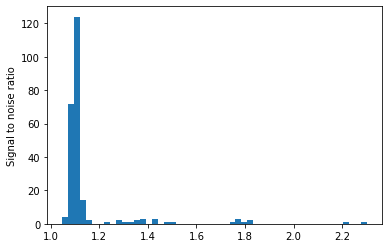

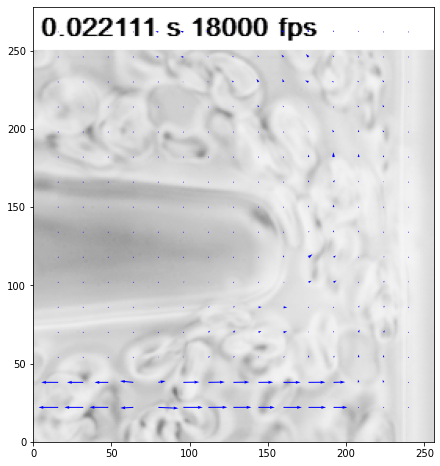

In [4]:
alist_filter = ['jpg','bmp','png','tif','tiff']

# all test cases in /openpiv/examples/
list_of_files = glob.glob('../test3/*.*')
list_of_files.sort()
list_of_images = [f for f in list_of_files if f[-3:] in alist_filter]
list_of_images.sort()
if len(list_of_images) > 1:
    print(list_of_images[0], list_of_images[1])
    openpiv_default_run(list_of_images[0],list_of_images[1],normalized_correlation=False)

../test3/Y4-S3_Camera000398.tif ../test3/Y4-S3_Camera000399.tif


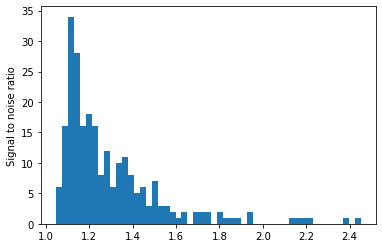

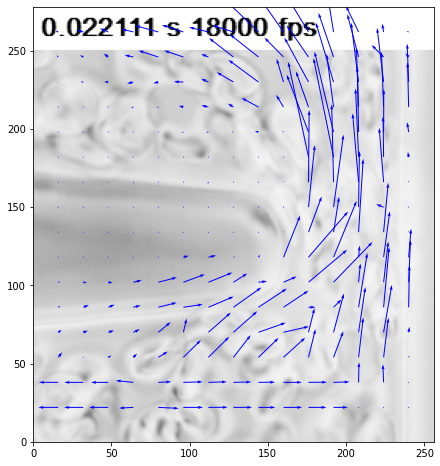

In [5]:
if len(list_of_images) > 1:
    print(list_of_images[0], list_of_images[1])
    openpiv_default_run(list_of_images[0],list_of_images[1],normalized_correlation=True)